# 点過程の勉強

## ポアソン過程のシミュレート

### 定常ポアソン

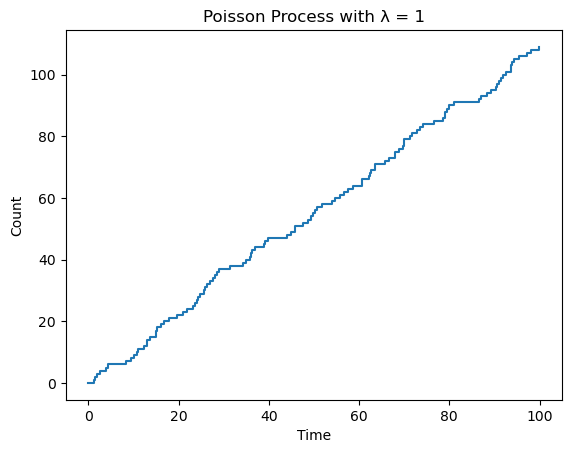

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

def simulate_poisson_process(lam, T):
    # ポアソン過程のイベント時間をシミュレートする
    times = np.random.exponential(1/lam, int(lam * T * 1.5))  # 指数分布に従う乱数を生成
    times = np.cumsum(times)  # 累積和を取ることでイベント時間を得る
    times = times[times <= T]  # 観測時間を超えるイベント時間を削除
    return times

def plot_poisson_process(times):
    # ポアソン過程をプロットする
    event_counts = np.arange(1, len(times) + 1)  # イベント数
    plt.step(np.concatenate(([0], times)), np.concatenate(([0], event_counts)), where='post')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.title('Poisson Process with λ = 1')
    plt.show()

T = 100  # 観察時間
lam = 1  # ポアソン過程の強度

times = simulate_poisson_process(lam, T)
plot_poisson_process(times)


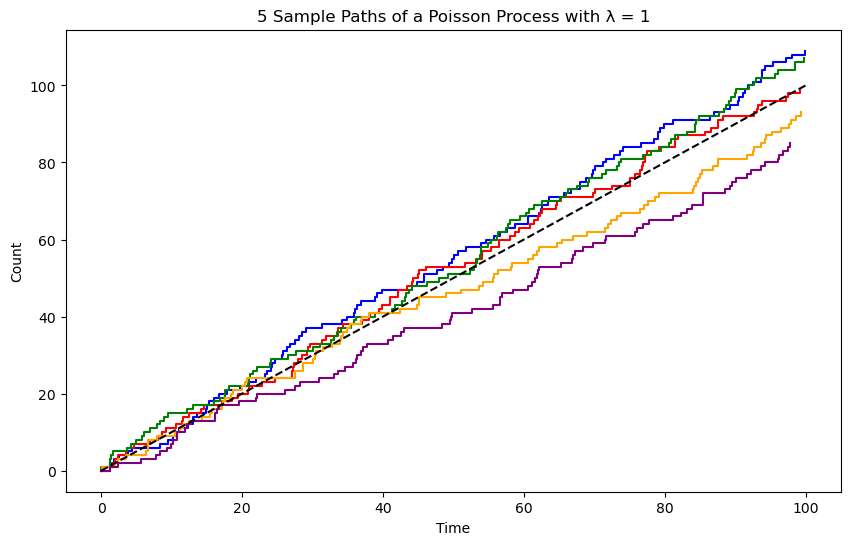

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

def simulate_poisson_process(lam, T):
    # ポアソン過程のイベント時間をシミュレートする
    times = np.random.exponential(1/lam, int(lam * T * 1.5)) 
    times = np.cumsum(times)
    times = times[times <= T]
    return times

def plot_poisson_process(times, color):
    # ポアソン過程をプロットする
    event_counts = np.arange(1, len(times) + 1)
    plt.step(np.concatenate(([0], times)), np.concatenate(([0], event_counts)), where='post', color=color)

T = 100  # 観察時間
lam = 1  # ポアソン過程の強度

plt.figure(figsize=(10,6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(5):  # 5つのサンプルパスをシミュレートする
    times = simulate_poisson_process(lam, T)
    plot_poisson_process(times, colors[i])

# 期待値（平均パス）を破線でプロットする
plt.plot([0, T], [0, lam * T], 'k--')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('5 Sample Paths of a Poisson Process with λ = 1')
plt.show()


### 非定常ポアソン

### 黒田先生の問題で出たやつ
$$
\lambda(t) =
\begin{cases}
2t, & \text{if } 0 < t < 1,\\
\frac{t}{2} + \frac{3}{2}, & \text{if } 1 \leq t < 3,\\
t, & \text{otherwise.}
\end{cases}
$$

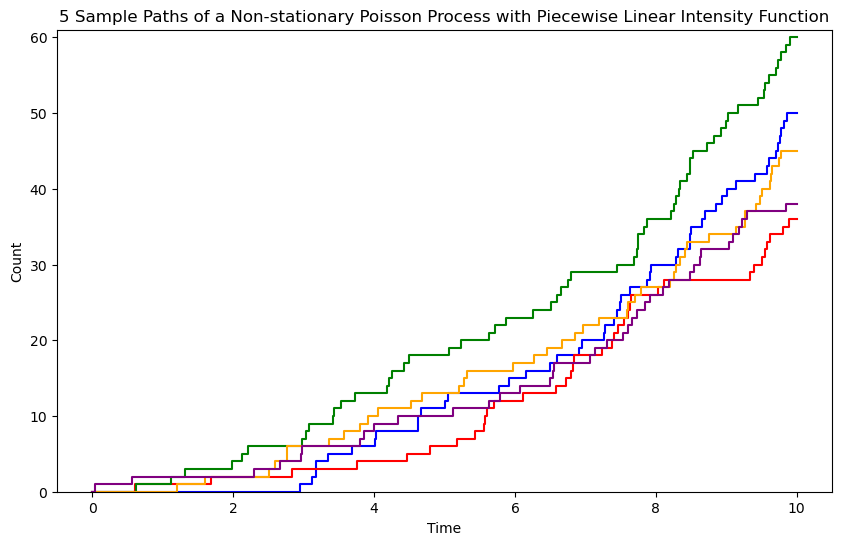

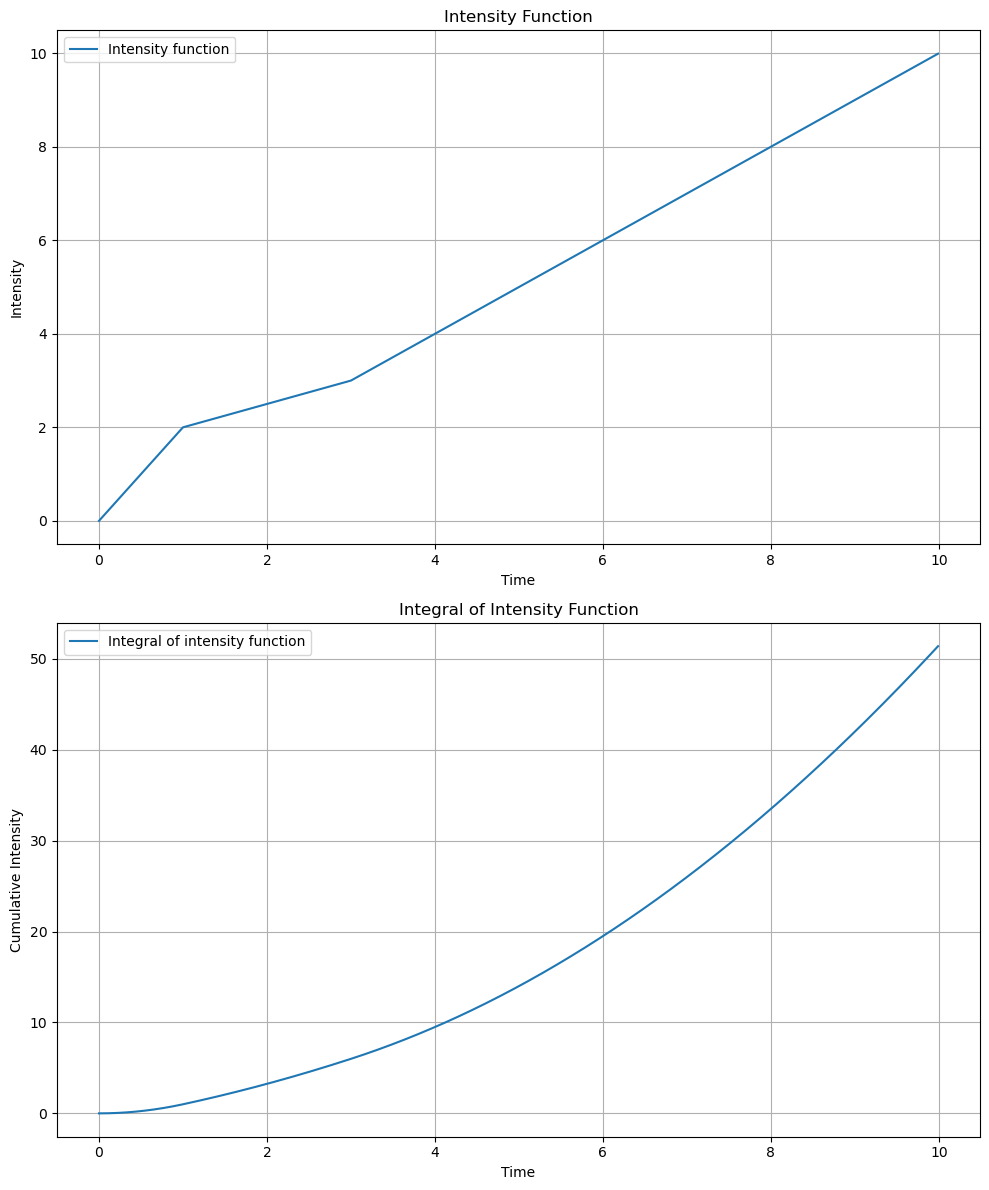

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

def piecewise_intensity(x):  # 強度関数を定義
    if x < 1:
        return 2*x
    elif x < 3:
        return x/2 + 3/2
    else:
        return x

def simulate_nonstationary_poisson_process(lam_func, T, dt):  # ポアソン過程をシミュレート
    N = int(T / dt)  # シミュレーションのステップ数
    times = np.arange(N) * dt  # 時間の配列
    intensities = np.array([lam_func(t) for t in times])  # 各時刻の強度
    events = np.random.rand(N) < intensities * dt  # イベントが発生したかどうか
    event_times = times[events]  # イベントの時刻
    return event_times

def plot_poisson_process(event_times, color, T):  # ポアソン過程をプロットする
    event_counts = np.arange(1, len(event_times) + 1)  # イベントの累積和
    if len(event_times) > 0:  # イベントが1つ以上発生した場合
        plt.step(np.concatenate(([0], event_times, [T])), np.concatenate(([0], event_counts, [event_counts[-1]])), where='post', color=color)
    else:   # イベントが1つも発生しなかった場合
        plt.step([0, T], [0, 0], where='post', color=color)

T = 10
dt = 0.01
times = np.arange(0, T, dt)

# 強度関数の計算
intensities = np.array([piecewise_intensity(t) for t in times])

# 積分関数の計算
integral = cumtrapz(intensities, times, initial=0)  # 積分により期待値を計算

# サンプルパスのシミュレーション
lam_func = lambda x: piecewise_intensity(x)  # 強度関数を定義
colors = ['blue', 'red', 'green', 'orange', 'purple']
max_count = 0

plt.figure(figsize=(10,6))

for i in range(5):  # 5つのサンプルパスをプロット
    event_times = simulate_nonstationary_poisson_process(lam_func, T, dt)   # ポアソン過程をシミュレート
    plot_poisson_process(event_times, colors[i], T)  # ポアソン過程をプロット
    max_count = max(max_count, len(event_times))  # カウントの最大値を更新

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('5 Sample Paths of a Non-stationary Poisson Process with Piecewise Linear Intensity Function')
plt.ylim([0, max_count+1])
plt.show()

# 強度関数とその積分をプロットする
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,12))

# 強度関数のプロット
ax1.plot(times, intensities, label='Intensity function')
ax1.set_xlabel('Time')
ax1.set_ylabel('Intensity')
ax1.set_title('Intensity Function')
ax1.legend()
ax1.grid(True)

# 積分関数のプロット
ax2.plot(times, integral, label='Integral of intensity function')
ax2.set_xlabel('Time')
ax2.set_ylabel('Cumulative Intensity')
ax2.set_title('Integral of Intensity Function')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 損保数理で出そうなやつ
$$
\lambda(t) =
\begin{cases}
t, & \text{if } t < \frac{T}{2},\\
-2t + 2T, & \text{if } \frac{T}{2} \leq t < T,\\
0, & \text{otherwise.}
\end{cases}
$$

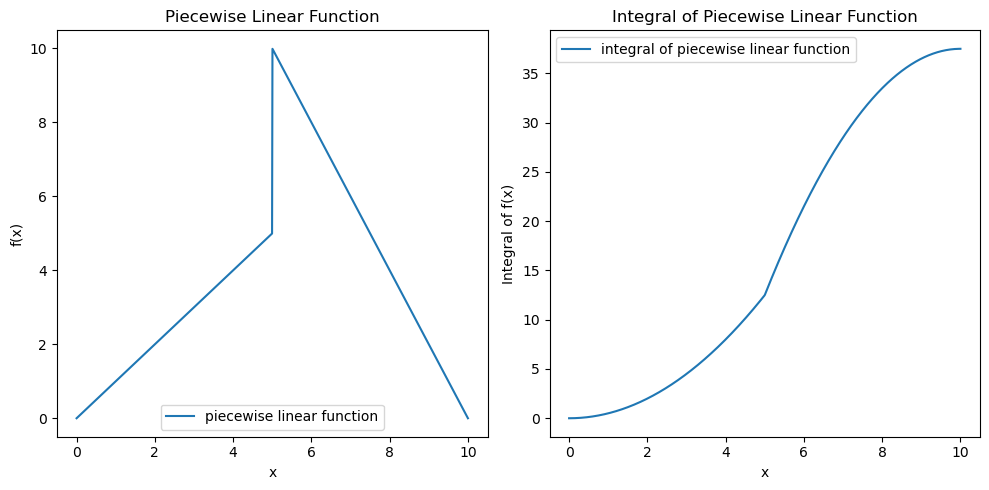

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

def piecewise_linear(x, T):
    if x < T/2:
        return x
    elif x < T:
        return -2*x + 2*T
    else:
        return 0

T = 10  # 観測時間
x = np.linspace(0, T, 1000)  # Tまでの範囲で均等に間隔を取った1000個の点
y = [piecewise_linear(i, T) for i in x]  # 各xに対するpiecewise_linear関数の値

# 関数をプロット
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='piecewise linear function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Piecewise Linear Function')
plt.legend()

# 積分をプロット
y_integral = cumtrapz(y, x, initial=0)  # 関数の積分
plt.subplot(1, 2, 2)
plt.plot(x, y_integral, label='integral of piecewise linear function')
plt.xlabel('x')
plt.ylabel('Integral of f(x)')
plt.title('Integral of Piecewise Linear Function')
plt.legend()

plt.tight_layout()  # グラフの間隔を自動調整
plt.show()

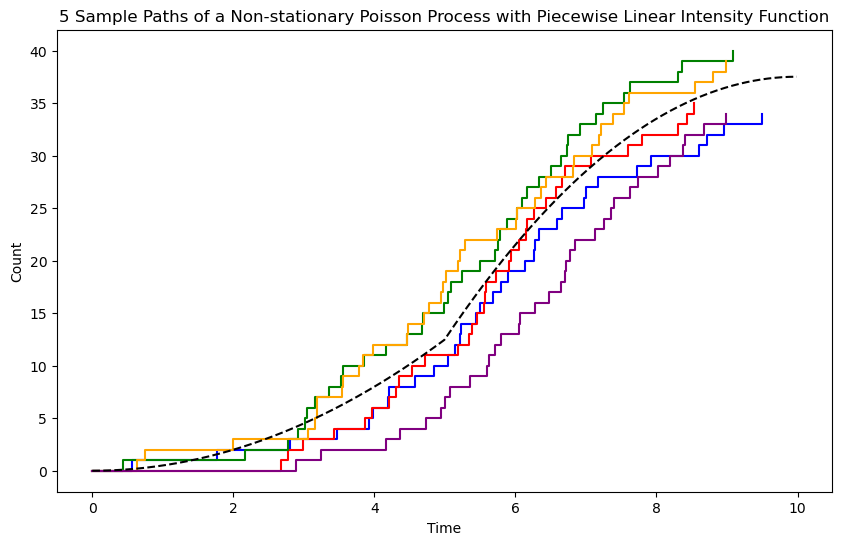

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

def piecewise_linear(x, T):
    if x < T/2:
        return x
    elif x < T:
        return -2*x + 2*T
    else:
        return 0

def simulate_nonstationary_poisson_process(lam_func, T, dt):
    # 非定常ポアソン過程のイベント時間をシミュレートする
    N = int(T / dt)  # シミュレーションのステップ数
    times = np.arange(N) * dt  # 時間配列
    intensities = np.array([lam_func(t, T) for t in times])  # 各時間ステップでの強度
    events = np.random.rand(N) < intensities * dt  # 各時間ステップでイベントが発生したかどうか
    event_times = times[events]  # イベントが発生した時間
    return event_times

def plot_poisson_process(event_times, color):
    # ポアソン過程をプロットする
    event_counts = np.arange(1, len(event_times) + 1)  # イベントの累積和
    plt.step(np.concatenate(([0], event_times)), np.concatenate(([0], event_counts)), where='post', color=color)

T = 10  # 観察時間
dt = 0.01  # シミュレーションの時間ステップサイズ

plt.figure(figsize=(10,6))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(5):  # 5つのサンプルパスをシミュレートする
    lam_func = lambda x, T: piecewise_linear(x, T) # 強度関数
    event_times = simulate_nonstationary_poisson_process(lam_func, T, dt)  # ポアソン過程をシミュレート
    plot_poisson_process(event_times, colors[i])

# 期待値（平均パス）を破線でプロットする
times = np.arange(0, T, dt)
expected_counts = cumtrapz(np.array([lam_func(t, T) for t in times]), times, initial=0)  # 強度関数の積分
plt.plot(times, expected_counts, 'k--')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('5 Sample Paths of a Non-stationary Poisson Process with Piecewise Linear Intensity Function')
plt.show()
